# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [2]:
# Load pickled data
import pickle
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = "C:/Users/lenovo/Documents/SDCND/traffic-signs-data/train.p"
validation_file="C:/Users/lenovo/Documents/SDCND/traffic-signs-data/valid.p"
testing_file = "C:/Users/lenovo/Documents/SDCND/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
print(len(np.unique(y_train)))
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

43


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [3]:
# import numpy as np

# # Pad images with 0s
# X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
# print("Updated Image Shape: {}".format(X_train[0].shape))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_test.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of validation examples =", n_validation)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Number of validation examples = 4410


### Include an exploratory visualization of the dataset

1
38


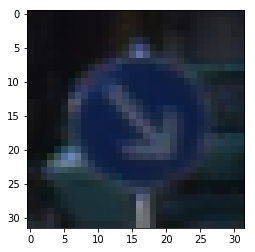

14


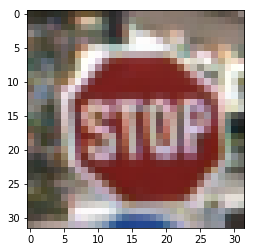

2


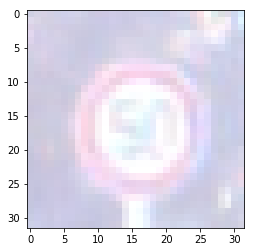

6


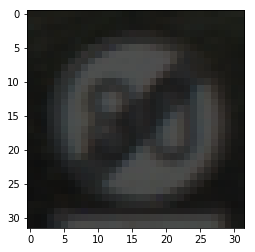

8


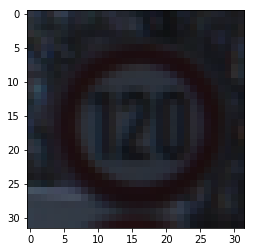

((array([  60.,  720.,  750.,  450.,  660.,  630.,  150.,  450.,  450.,
          480.,  660.,  420.,  690.,  720.,  270.,  210.,  150.,  360.,
          390.,   60.,   90.,   90.,  120.,  150.,   90.,  480.,  180.,
           60.,  150.,   90.,  150.,  270.,   60.,  210.,  120.,  390.,
          120.,   60.,  690.,   90.,   90.,   60.,   90.]),
  array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
           3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
           7.81395349,   8.79069767,   9.76744186,  10.74418605,
          11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
          15.62790698,  16.60465116,  17.58139535,  18.55813953,
          19.53488372,  20.51162791,  21.48837209,  22.46511628,
          23.44186047,  24.41860465,  25.39534884,  26.37209302,
          27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
          31.25581395,  32.23255814,  33.20930233,  34.18604651,
          35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
  

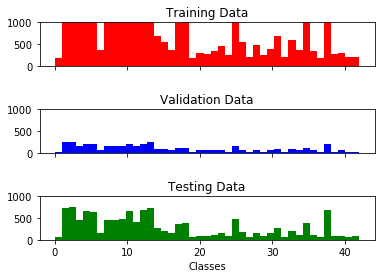

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline
numbers = np.random.randint(0, X_train.shape[0], 5)
for i in (numbers):
    print(y_train[i])
    plt.imshow(X_train[i].squeeze(), cmap = 'gray'), plt.show()
dist_list = []
for j in range(43):
    dist_list.append(np.count_nonzero(y_train == j))
f, (ptrain, pvalid, ptest) = plt.subplots(3, sharex=True, sharey=True)
f.subplots_adjust(hspace = 1)
ptrain.hist(y_train, bins = 43, facecolor = 'red'), ptrain.set_title("Training Data"), ptrain.set_ylim([0,1000])
pvalid.hist(y_valid, bins = 43, facecolor = 'blue'), pvalid.set_title("Validation Data")
ptest.hist(y_test, bins = 43, facecolor = 'green'), ptest.set_title("Testing Data"), ptest.set_xlabel("Classes")


## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [6]:
from sklearn.utils import shuffle
from sklearn import preprocessing

#X_train, y_train = shuffle(X_train, y_train)
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
X_train_max = X_train.max(axis = (1, 2), keepdims = True)
X_train_min = X_train.min(axis = (1, 2), keepdims = True)
X_train_mean = X_train.mean(axis = (1, 2), keepdims = True)
X_train = (X_train - X_train_min) / (X_train_max - X_train_min)
X_valid_max = X_valid.max(axis = (1, 2), keepdims = True)
X_valid_min = X_valid.min(axis = (1, 2), keepdims = True)
X_valid = (X_valid - X_valid_min) / (X_valid_max - X_valid_min)
print(X_valid[0,:,:,0])
print (X_train[0,:,:,0])

[[ 0.06756757  0.05405405  0.06756757 ...,  0.08108108  0.06756757
   0.05405405]
 [ 0.06756757  0.05405405  0.06756757 ...,  0.06756757  0.06756757
   0.05405405]
 [ 0.06756757  0.05405405  0.05405405 ...,  0.06756757  0.06756757
   0.05405405]
 ..., 
 [ 0.10810811  0.09459459  0.09459459 ...,  0.06756757  0.08108108
   0.08108108]
 [ 0.13513514  0.12162162  0.13513514 ...,  0.05405405  0.06756757
   0.08108108]
 [ 0.14864865  0.13513514  0.14864865 ...,  0.05405405  0.06756757
   0.09459459]]
[[ 0.03409091  0.02272727  0.02272727 ...,  0.07954545  0.06818182
   0.06818182]
 [ 0.04545455  0.02272727  0.02272727 ...,  0.07954545  0.06818182
   0.05681818]
 [ 0.03409091  0.02272727  0.01136364 ...,  0.07954545  0.06818182
   0.05681818]
 ..., 
 [ 0.02272727  0.03409091  0.05681818 ...,  0.02272727  0.03409091
   0.04545455]
 [ 0.03409091  0.04545455  0.06818182 ...,  0.02272727  0.03409091
   0.03409091]
 [ 0.04545455  0.05681818  0.07954545 ...,  0.02272727  0.02272727
   0.01136364]]


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [7]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128
#BATCH_SIZE = 250

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [8]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    sz = 5*5*3*6
    Wl1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mu, sigma))
    #Wl1 = tf.Variable(tf.random_uniform([5, 5, 3, 6], minval = (-2.45/np.sqrt(sz)), maxval = (2.45/np.sqrt(sz))))
    b1 = tf.Variable(tf.zeros([6]))
    sz = (5*5*6*16)
    Wl2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma))
    #Wl2 = tf.Variable(tf.random_uniform([5, 5, 6, 16], minval = (-2.45/np.sqrt(sz)), maxval = (2.45/np.sqrt(sz))))
    b2 = tf.Variable(tf.zeros([16]))
    sz = (400*120)
    Wl3 = tf.Variable(tf.truncated_normal([400, 120], mu, sigma))
    #Wl3 = tf.Variable(tf.random_uniform([400, 120], minval = (-2.45/np.sqrt(sz)), maxval = (2.45/np.sqrt(sz))))
    b3 = tf.Variable(tf.zeros([120]))
    Wl4 = tf.Variable(tf.truncated_normal([120, 84], mu, sigma))
    sz = (120*84)
    #Wl4 = tf.Variable(tf.random_uniform([120, 84], minval = (-2.45/np.sqrt(sz)), maxval = (2.45/np.sqrt(sz))))
    b4 = tf.Variable(tf.zeros([84]))
    sz = (84*43)
    Wout = tf.Variable(tf.truncated_normal([84, 43], mu, sigma))
    #Wlout = tf.Variable(tf.random_uniform([84, 43], minval = (-2.45/np.sqrt(sz)), maxval = (2.45/np.sqrt(sz))))
    bout = tf.Variable(tf.zeros([43]))
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, Wl1, [1, 1, 1, 1], padding = 'VALID')
    conv1 = tf.nn.bias_add(conv1, b1)
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(pool1, Wl2, strides = [1, 1, 1, 1], padding= 'VALID')
    conv2 = tf.nn.bias_add(conv2, b2)
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    poolflat = tf.contrib.layers.flatten(pool2)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc3 = tf.add(tf.matmul(poolflat, Wl3), b3)
    
    # TODO: Activation.
    fc3 = tf.nn.relu(fc3)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc4 = tf.add(tf.matmul(fc3, Wl4), b4)
    # TODO: Activation.
    fc4 = tf.nn.relu(fc4)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(fc4, Wout), bout)
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [10]:
#rate = 0.005 valid_acc = 93.8%
rate = 0.006

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
print(1)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

1


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 100, test_size = 0.9, random_state = 42)
sss.get_n_splits(X_train, y_train)
for train_index, test_index in sss.split(X_train, y_train):
    X_train_small = X_train[train_index]
    y_train_small = y_train[train_index]
print(X_train_small.shape)

(3479, 32, 32, 3)


## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        loss_batch = 0
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            loss_batch += (sess.run(loss_operation, feed_dict = {x:batch_x, y:batch_y})
            
        
        plt.plot(epoch, loss_batch), plt.title("Training Error vs Epochs")
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    plt.show()    
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.867

EPOCH 2 ...
Validation Accuracy = 0.902

EPOCH 3 ...
Validation Accuracy = 0.902

EPOCH 4 ...
Validation Accuracy = 0.927

EPOCH 5 ...
Validation Accuracy = 0.927

EPOCH 6 ...
Validation Accuracy = 0.918

EPOCH 7 ...
Validation Accuracy = 0.932

EPOCH 8 ...
Validation Accuracy = 0.932

EPOCH 9 ...
Validation Accuracy = 0.930

EPOCH 10 ...
Validation Accuracy = 0.938

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))